<hr/>

<b>Notebook Summary</b>

These notes are based on Prof. Norman Wildberger's lectures on Dynamics on Graphs which can be found <a href="https://www.youtube.com/c/WildEggmathematicscourses/featured">here</a>. 
    
They notes are are being hosted at my website <a href="https://www.ladatavita.com/">ladatavita.com</a> and the Jupyter notebook is also available from my Github repo at: <a href="https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks">https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks</a>

The purpose of this notebook is a continuation where we left off in the previous notebook ES2, which compared the root populations of ADE graphs and ADE~ graph. 

This notebook will continue the investigation.... 

<hr/>

In [1]:
import pyvis.network as nt
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import networkx as nx
import string
import random

<hr/>

<b>Aim</b>: Reintroduce some functions from previous notebooks and add a new visualisation and function to introduce stable populations

<hr/>

<b>Let</b> $F1$ is a function that, given a list of edges will create a graph and randomly initialise a singleton population. 

<b>Let</b> $F2$ is a function that, given a list of edges and poopuations, will create a graph with the given population. 

<b>Let</b> $F3$ is a visualisation function that will render a graph with its population with label position offset

<b>Let</b> $F4$ is a function that, given a graph and node choice, will apply the $ps_x$ function to a single vertice

<b>Let</b> $F5$ is a function that will apply the $ps_x$ function to each node in succession over a chosen number of iterations

In [2]:
def F1(edges=None):
    
    verticeLabels = list(set([item for sublist in edges for item in sublist]))
    randomNumberToIntialiseSingletonPopulation = random.randint(0, len(verticeLabels) - 1)

    vertices = [(verticeLabels[i], {"population": 0}) for i in range(len(verticeLabels))]
    graph = nx.Graph()
    graph.add_nodes_from(vertices)
    graph.add_edges_from(edges)
    
    graph.nodes[verticeLabels[randomNumberToIntialiseSingletonPopulation]]['population'] = 1
    
    return(graph)

def F2(edges=None, population = None):
    
    verticesFoundInEdges = len(list(set([item for sublist in edges for item in sublist])))

    vertices = list(string.ascii_lowercase[0:verticesFoundInEdges])
    
    verticesWithPopulations = [(vertices[i], {"population": population[i]}) for i in range(len(vertices))]

    graph = nx.Graph()
    graph.add_nodes_from(verticesWithPopulations)
    graph.add_edges_from(edges)
    

    return(graph)
        
    
    
def F3(graph):
    x = {}
    pos = nx.spring_layout(graph)
    labels = nx.get_node_attributes(graph, 'population') 
    for i in labels:
        x[i] = "id=" + str(i) +" \npop=" + str(labels[i])
     # change margins if you adding    
    #plt.margins(x=0.2, y = 0.2) horizontalalignment='left'
    nx.draw(graph, pos, edge_color = "steelblue", node_color = "white")
    nx.draw_networkx_labels(graph, pos,  labels = x, font_size=10)

In [3]:
def F4(graph = None, nodeChoice = None, printSummary = True, 
       returnUpdatedGraph = False, 
       returnListOfPopulations = False,
      returnAllAsDict = False):
   
    edgesOfChosenNode = list(nx.edges(graph, [nodeChoice]))
   
    neigborOfChosenNode = [edgesOfChosenNode[i][1] for i in range(len(list(edgesOfChosenNode)))]
    nodeChoicePopulation = graph.nodes[nodeChoice]['population']
    sumOfNeighborsOfChosenNode = np.sum([graph.nodes[i]['population'] for i in neigborOfChosenNode])
    populationOfNode = -nodeChoicePopulation + sumOfNeighborsOfChosenNode
    updatedGraph = graph.copy()
    updatedGraph.nodes[nodeChoice]['population'] = populationOfNode

    newPopulations = [updatedGraph.nodes[i]['population'] for i in list(updatedGraph)]
    if printSummary:
        print("Node choice", 
              nodeChoice,
              "\nNode details",
              nx.nodes(graph)[nodeChoice],
              "\nChange in node population ",
              nx.nodes(graph)[nodeChoice]['population'], 
              "->", 
              populationOfNode)
        print("Updated node populations of graph: ", newPopulations, "\n")

    if returnUpdatedGraph: 
        return(updatedGraph)
    
    if returnListOfPopulations:
        return(np.array(newPopulations))
    
    if returnAllAsDict:
        return({"graph": updatedGraph,
               "population": np.array(newPopulations)})
    
def F5(graphChoice=None, vertices = [], iterations=5, returnPopulations = True, iterateThroughAllVertices = True):
    listOfAllPopulations = []
    graph = graphChoice
    
    if iterateThroughAllVertices:
        vertices = graph.nodes
    
    for i in range(iterations):
        for j in vertices:
            udpatedGraphAndPopulation = F4(graph, j, returnAllAsDict=True, printSummary = False)
            graph = udpatedGraphAndPopulation['graph']
            population = udpatedGraphAndPopulation['population']
            listOfAllPopulations.append(population)
            
    print("Number of unique populations: ", len(list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))))
    if returnPopulations:
        setOfAllPopulations = list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))
        return({"iterations":iterations,
               "populationAsSetCount":len(setOfAllPopulations),
                "populationAsListCount":len(listOfAllPopulations),
               "populationsAsSet": setOfAllPopulations,
               "populationsAsList": listOfAllPopulations})

<b>Observe</b> that we can test each of the functions with an example

<b>Let</b> $F6$ be an example of a graph 

In [4]:
F6= F2(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("e","f"), ("f", "a")], 
       population=[1,2,3,4,5,6])

<b>Let</b> $F7$ be an example of a visualisation of $F6$

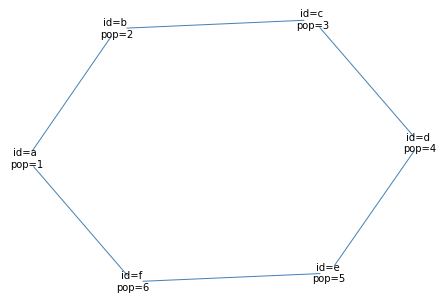

In [5]:
F7 = F3(F6)
F7

<b>Let</b> $F8$ be an example of iterating through the vertices and applying the $ps_x$ mutation function, implemented in $F4$ and $F5$

In [6]:
F8 = F5(graphChoice=F6, iterations=10, returnPopulations=True)
F8['populationsAsSet'][0:3]

Number of unique populations:  60


[(55, 56, 57, 58, 59, 54), (37, 38, 33, 34, 35, 36), (19, 20, 21, 22, 17, 18)]

<hr/>

<b>Aim</b> Explore the ADE~ graphs in more detail to understand their importance and introduce the idea of a stable population

<hr/>

<b>Let</b> $X$ be a connected simple graph. 

<b>Let</b> $P(X) \equiv \text{populations on } X$.

<b>Recall</b> from <a href = "#">Notebook ES1_1</a> that, for the vertex, $x$ in the graph $X$, the population function $S_x:P(x)  \rightarrow P(X)$ can be defined by: 

$$ ps_x(y) \equiv  \begin{cases}
    -p(x) + \Sigma_{z \in N(x)} \text{ }  p(z) & \text{if y = x}\\
    p(y) & \text{otherwise}
\end{cases}
$$ 

<b>Observe</b> that $y$ here is any arbitrary vertex chosen.

<b>Definition</b>: A population, $p \in P(X)$ is <b>stable</b> $\iff$ $ps_x = p$ for any vertex $x$ of a connected simple graph $X$, meaning that it is left invariant under every mutation and that population will not change when the mutation function is applied.

<b>Observe</b> that this is immedieately equivalent to the condition: 

$$ 2p(x) = \Sigma_{z\in N(x)} p(z) $$

for any vertex $x$ of $X$ or

$$ p(x) = \frac{1}{2} \Sigma_{z \in N(x)} p(z) $$

<b>Let</b> $F9$ be an $A_n$ graph with a population $[1,1,1,1,1,1]$  and provide an accompanying visualisation

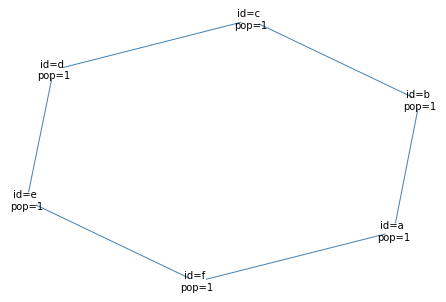

In [7]:
F9= F2(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("e","f"), ("f", "a")], 
       population=[1,1,1,1,1,1])
F3(F9)

<b>Let</b> $F10$ be the application of $ps_x$ over 10 iterations to find the unique populations

In [8]:
F10 = F5(graphChoice=F9, iterations=1000, returnPopulations=True)
F10['populationsAsSet']

Number of unique populations:  1


[(1, 1, 1, 1, 1, 1)]

<b>Observe</b> that the chosen population does not change (here tested over 10000 iterations and is therefore a stable graph. 

<b>Let</b> $F11$ be the simple connected graph $D_4 \text{~}$  with a given population $[1,2,1,1,1]$

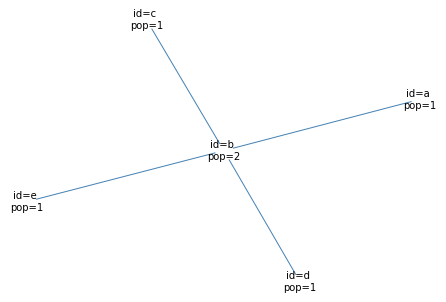

In [9]:
F11= F2(edges=[("a","b"),("b","c"),("b","d"),("b","e")], 
       population=[1,2,1,1,1])
F3(F11)

<b>Let</b> $F12$ be the application of $ps_x$ function with 10000 iterations to find unique populations

In [10]:
F12 = F5(graphChoice=F11, iterations=10000, returnPopulations=True)
F12['populationsAsSet']

Number of unique populations:  1


[(1, 2, 1, 1, 1)]

<b>Observe</b> that, like $A_n  \text{~}$ $F12$, the $D_4  \text{~}$ graph does not change under mutation (at least up to 10000 mutations) and is regarded as a stable graph. 

<b>Observe</b> that it is possible to extend $D_4 \text{~}$  to a more general $D_n \text{~}$ where $n \ge 5 $

<b>Let</b> $F13$ be the simple connected graph $D_n \text{~}$, (where $n$ has been chosen as 8)  with a given population $[1,2,1,2,2, 2, 2, 1,1]$

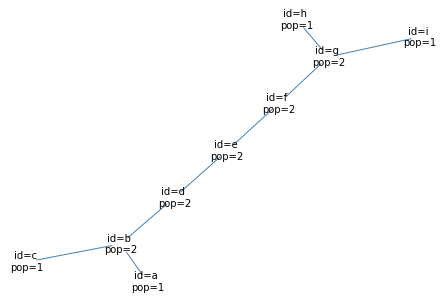

In [11]:
F13= F2(edges=[("a","b"),("b","c"),("b","d"),("d","e"),("e","f"),("f","g"), ("g","h"), ("g","i")], 
       population=[1,2,1,2,2, 2, 2, 1,1])
F3(F13)

<b>Let</b> $F15$ be the application of $ps_x$ function with 10000 iterations to find unique populations

In [12]:
F14 = F5(graphChoice=F13, iterations=10000, returnPopulations=True)
F14['populationsAsSet']

Number of unique populations:  1


[(1, 2, 1, 2, 2, 2, 2, 1, 1)]

<b>Observe</b> that, like the other $ADE\text{~}$ examined above,  $D_8  \text{~}$ (being an example of $D_n  \text{~}$) graph does not change under mutation (at least up to 10000 mutations) and is regarded as a stable graph. 

<b>Observe</b> that we can keep on extending this idea to include other $ADE \text{~}$ graphs, such as  $E_6 \text{~}$,$E_7 \text{~}$ and $E_8 \text{~}$.

<b>Let</b> $F15$ be the simple connected graph $E_6 \text{~}$, with a given population $[1,2,1,2,2, 2, 2, 1,1]$

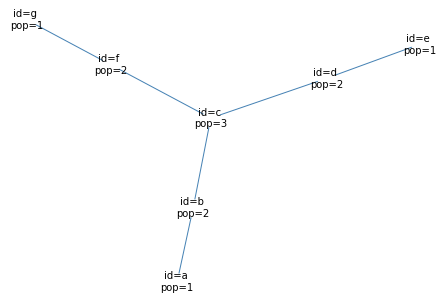

In [13]:
F15= F2(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("c","f"),("f","g")], 
       population=[1,2,3,2,1, 2, 1])
F3(F15)

<b>Let</b> $F16$ be the application of $ps_x$ function with 10000 iterations to find unique populations

In [14]:
F16 = F5(graphChoice=F15, iterations=10000, returnPopulations=True)
F16['populationsAsSet']

Number of unique populations:  1


[(1, 2, 3, 2, 1, 2, 1)]

<b>Observe</b> that, again, with the chosen population,  $E_6  \text{~}$ does not change under mutation (at least up to 10000 mutations) and is regarded as a stable graph. 


<b>Let</b> $F17$ be the simple connected graph $E_7 \text{~}$, with a given population $[1,2,1,2,2, 2, 2, 1,1]$

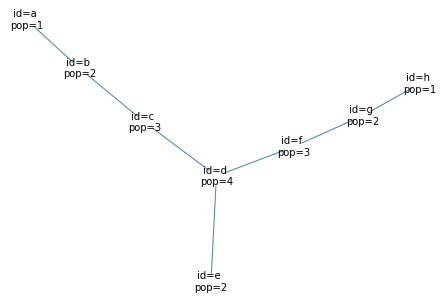

In [15]:
F17= F2(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("d","f"),("f","g"), ("g","h")], 
       population=[1,2,3,4,2, 3, 2, 1])
F3(F17)

<b>Let</b> $F18$ be the application of $ps_x$ function with 10000 iterations to find unique populations

In [16]:
F18 = F5(graphChoice=F15, iterations=10000, returnPopulations=True)
F18['populationsAsSet']

Number of unique populations:  1


[(1, 2, 3, 2, 1, 2, 1)]

<b>Observe</b> that, again, with the chosen population,  $E_7  \text{~}$ does not change under mutation (at least up to 10000 mutations) and is regarded as a stable graph. 

<b>Let</b> $F17$ be the simple connected graph $E_8 \text{~}$, with a given population $[1,2,1,2,2, 2, 2, 1,1]$

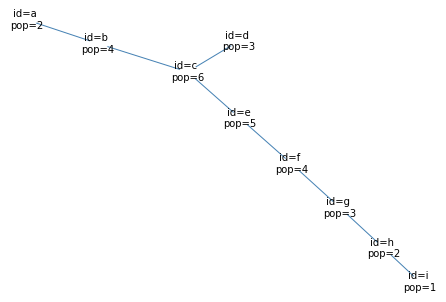

In [17]:
F19= F2(edges=[("a","b"),("b","c"),("c","d"),("c","e"),("e","f"),("f","g"), ("g","h"), ("h", "i")], 
       population=[2,4,6,3,5, 4, 3, 2, 1])
F3(F19)

<b>Let</b> $F20$ be the application of $ps_x$ function with 10000 iterations to find unique populations

In [18]:
F20= F5(graphChoice=F19, iterations=10000, returnPopulations=True)
F20['populationsAsSet']

Number of unique populations:  1


[(2, 4, 6, 3, 5, 4, 3, 2, 1)]

<b>Observe</b> that this suggests that all  $ADE  \text{~}$ are invariant under mutation with these chosen population.  

<b>Observe</b> It is also possible to check that populations of $ADE \text{~}$ graphs remain stable under scaling. 

<b>Let $F21$</b> be a function that, given a graph, number of iterations for mutation for applying the mutation function to all vertices, and scaling factor, returns the population after scaling. 

In [19]:
def F21(initialGraph,  scalarIterations, mutationIterations,):
    initialPopulation = nx.get_node_attributes(initialGraph, 'population') 
    
    print("\nScaling factor to be applied: ", scalarIterations)
    for i in range(1, scalarIterations + 1):
        scaledGraph = initialGraph.copy()
        
        for j in initialPopulation.keys():    
            scaledGraph.nodes[j]['population'] = initialGraph.nodes[j]['population'] * i
        
        mutatedPopulationForScaledGraph = F5(graphChoice=scaledGraph, iterations=mutationIterations, returnPopulations=True)
        print("Set of population after scaling: ", mutatedPopulationForScaledGraph['populationsAsSet'])


<b>Observe</b> that it is possible to test $F21$ using an $A_n$ graph. 

<b>Let</b> $F22$ be a $A_n$ graph.

In [20]:
F22 = F2(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("e","f"), ("f", "a")], 
       population=[1,1,1,1,1,1])

<b>Let</b> $F23$ be a an application of the function$F21$, which will apply 100 iterations of moving through the vertices to apply the mutation function $F22$ and increase the scaling factor iteratively from 1 to 10.  

In [21]:
F32 = F21(F22, 10 , 100)


Scaling factor to be applied:  10
Number of unique populations:  1
Set of population after scaling:  [(1, 1, 1, 1, 1, 1)]
Number of unique populations:  1
Set of population after scaling:  [(2, 2, 2, 2, 2, 2)]
Number of unique populations:  1
Set of population after scaling:  [(3, 3, 3, 3, 3, 3)]
Number of unique populations:  1
Set of population after scaling:  [(4, 4, 4, 4, 4, 4)]
Number of unique populations:  1
Set of population after scaling:  [(5, 5, 5, 5, 5, 5)]
Number of unique populations:  1
Set of population after scaling:  [(6, 6, 6, 6, 6, 6)]
Number of unique populations:  1
Set of population after scaling:  [(7, 7, 7, 7, 7, 7)]
Number of unique populations:  1
Set of population after scaling:  [(8, 8, 8, 8, 8, 8)]
Number of unique populations:  1
Set of population after scaling:  [(9, 9, 9, 9, 9, 9)]
Number of unique populations:  1
Set of population after scaling:  [(10, 10, 10, 10, 10, 10)]


<b>Let</b> $F33$ be applying scaling to all graphs  $ADE\text{~}$ created earlier in this notebook, $F9, F11, F13, F15, F17$ and $F19$ 

In [22]:
F33 = [F21(i, 5, 100) for i in [F9, F11, F13, F15, F17, F19]]


Scaling factor to be applied:  5
Number of unique populations:  1
Set of population after scaling:  [(1, 1, 1, 1, 1, 1)]
Number of unique populations:  1
Set of population after scaling:  [(2, 2, 2, 2, 2, 2)]
Number of unique populations:  1
Set of population after scaling:  [(3, 3, 3, 3, 3, 3)]
Number of unique populations:  1
Set of population after scaling:  [(4, 4, 4, 4, 4, 4)]
Number of unique populations:  1
Set of population after scaling:  [(5, 5, 5, 5, 5, 5)]

Scaling factor to be applied:  5
Number of unique populations:  1
Set of population after scaling:  [(1, 2, 1, 1, 1)]
Number of unique populations:  1
Set of population after scaling:  [(2, 4, 2, 2, 2)]
Number of unique populations:  1
Set of population after scaling:  [(3, 6, 3, 3, 3)]
Number of unique populations:  1
Set of population after scaling:  [(4, 8, 4, 4, 4)]
Number of unique populations:  1
Set of population after scaling:  [(5, 10, 5, 5, 5)]

Scaling factor to be applied:  5
Number of unique populations:  1

<b>Observe</b> that the result seen $F33$ means that, for the number of iterations provided, that stable populations appear to remain stable under scalar operations.  

<b>Summary</b> Are there any other connected simple graphs $X$ that have a (non-zero) stable popualation

<hr/>


<b>Aim</b> Revisit the $ADE$ graphs when given singleton populations, and exclusions $ADE \text{~}$ after showing they were unbounded


<hr/>

<b>Recall</b> that the $ADE \text{~}$ graphs each have an unbounded number fo root populations, but this was not a strong argument. It is possible to support this stable populations 



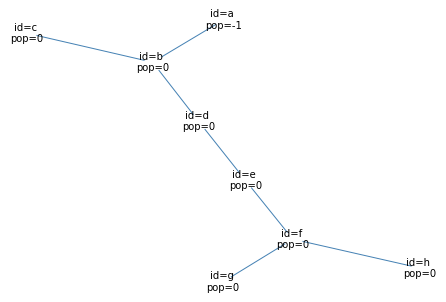

In [23]:
F34= F2(edges=[("a","b"),("b","c"),("b","d"),("d","e"),("e","f"),("f","g"), ("f","h")], 
       population=[-1,0,0,0,0, 0, 0, 0,])
F3(F34)

In [24]:
F20= F5(graphChoice=F34, iterations=10, returnPopulations=True)
F20['populationsAsSet']

Number of unique populations:  38


[(0, 1, 0, 1, 2, 2, 1, 1),
 (1, 3, 1, 3, 3, 3, 1, 1),
 (1, 3, 1, 3, 4, 4, 2, 2),
 (1, 1, 1, 1, 1, 1, 0, 0),
 (1, 2, 2, 2, 2, 2, 1, 1),
 (1, 1, 1, 1, 1, 0, 0, 0),
 (2, 3, 2, 3, 3, 4, 2, 2),
 (1, 3, 1, 3, 2, 2, 1, 1),
 (2, 3, 2, 3, 3, 3, 2, 2),
 (1, 3, 1, 3, 3, 3, 2, 2),
 (1, 1, 1, 1, 1, 1, 1, 1),
 (2, 3, 1, 3, 4, 4, 2, 2),
 (1, 1, 1, 1, 0, 0, 0, 0),
 (1, 1, 1, 1, 1, 2, 1, 1),
 (1, 1, 0, 0, 0, 0, 0, 0),
 (1, 3, 2, 2, 2, 2, 1, 1),
 (1, 3, 2, 4, 4, 4, 2, 2),
 (1, 3, 2, 3, 3, 4, 2, 2),
 (1, 3, 1, 2, 2, 2, 1, 1),
 (1, 3, 1, 3, 3, 2, 1, 1),
 (0, 1, 1, 1, 1, 1, 1, 1),
 (1, 1, 0, 1, 1, 2, 1, 1),
 (1, 3, 1, 3, 3, 3, 2, 1),
 (1, 1, 1, 1, 1, 1, 1, 0),
 (0, 1, 0, 1, 1, 1, 1, 1),
 (0, 1, 0, 2, 2, 2, 1, 1),
 (0, 1, 0, 1, 1, 2, 1, 1),
 (1, 1, 0, 2, 2, 2, 1, 1),
 (1, 2, 0, 2, 2, 2, 1, 1),
 (2, 3, 2, 3, 4, 4, 2, 2),
 (1, 1, 1, 1, 2, 2, 1, 1),
 (1, 1, 1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 0, 0, 0),
 (0, 1, 1, 1, 2, 2, 1, 1),
 (2, 3, 1, 3, 3, 3, 2, 2),
 (1, 3, 1, 3, 3, 4, 2, 2),
 (2, 3, 2, 4, 4, 4, 2, 2),
 